In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

from sklearn.ensemble import IsolationForest
import joblib


C:\Users\patil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\patil\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv(r'D:\Oasis\TASK 7\archive (11)\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()
print("\nStatistical Summary:")
df.describe()
print("\nMissing Values:")
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0    284315
1       492
Name: count, dtype: int64


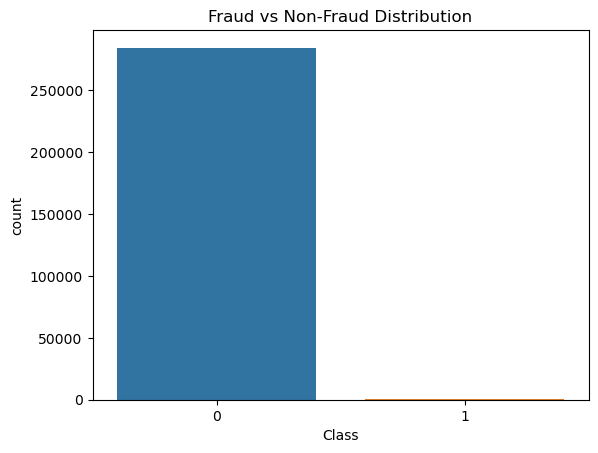

In [8]:
#Fraud Distribution
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

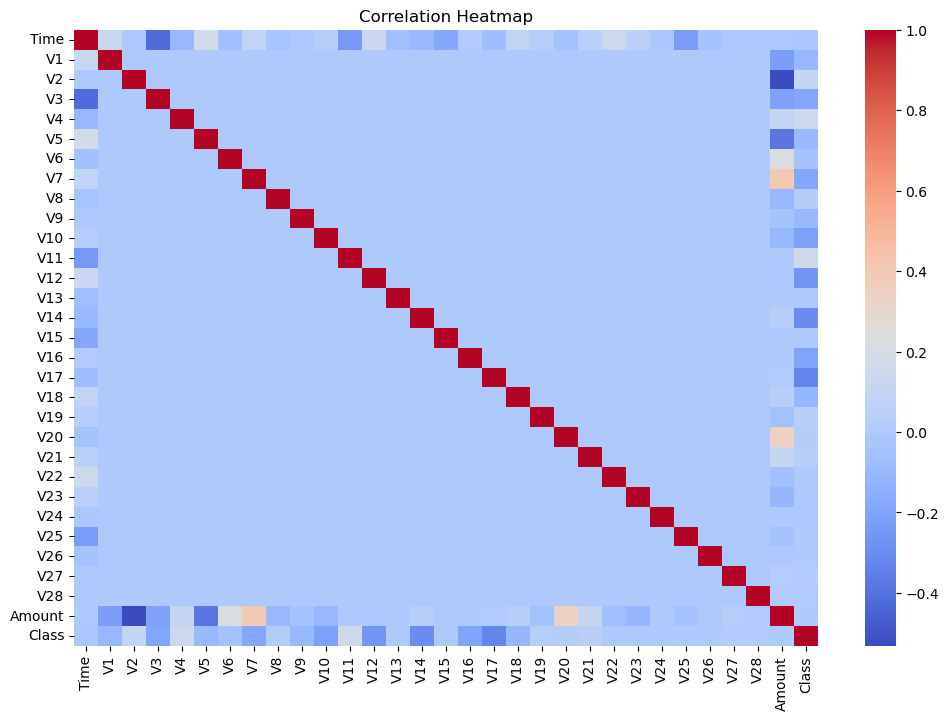

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Split features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300)
}



Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUC Score: 0.9469791152251559


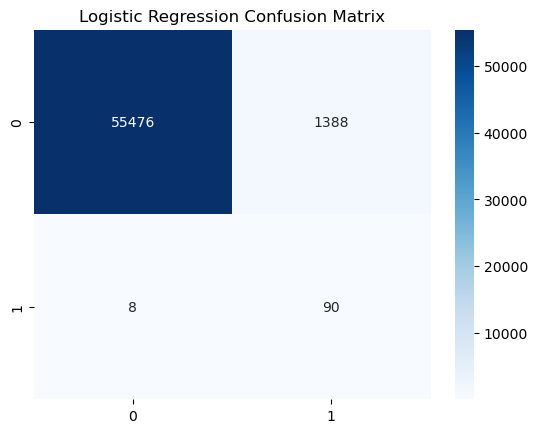


Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.72      0.70        98

    accuracy                           1.00     56962
   macro avg       0.84      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 0.8619459390396564


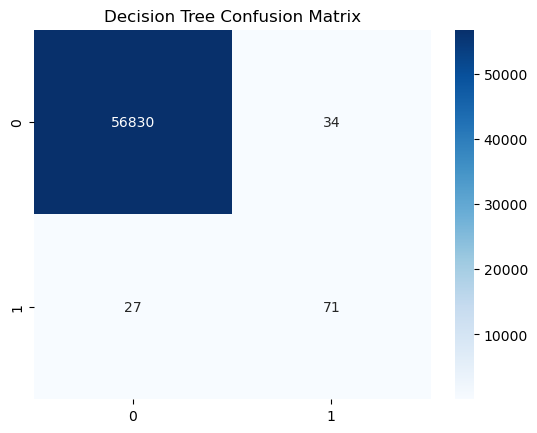


Training Neural Network...
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 0.8927780066725619


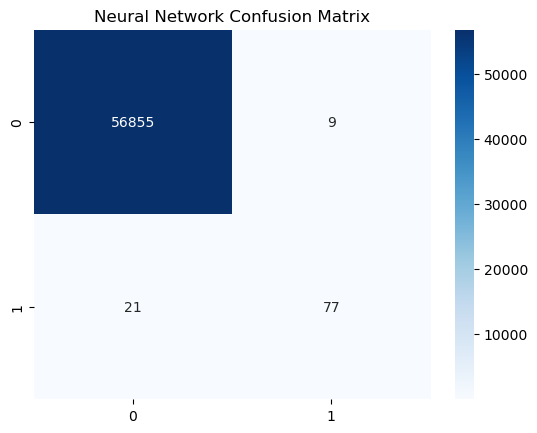

In [12]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    print(f"{name} Classification Report:")
    print(classification_report(y_test, preds))

    # AUC Score
    auc = roc_auc_score(y_test, preds)
    print("AUC Score:", auc)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


<Figure size 800x600 with 0 Axes>

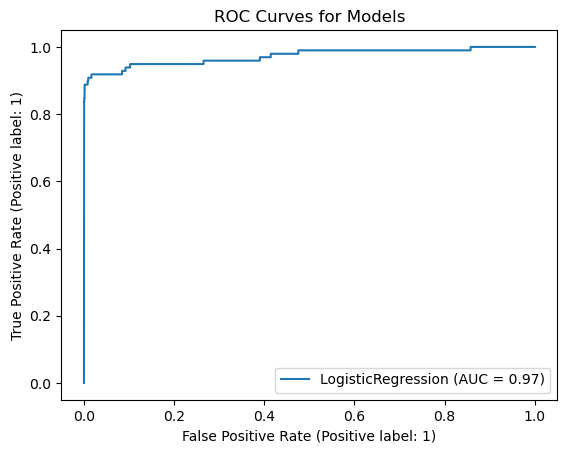

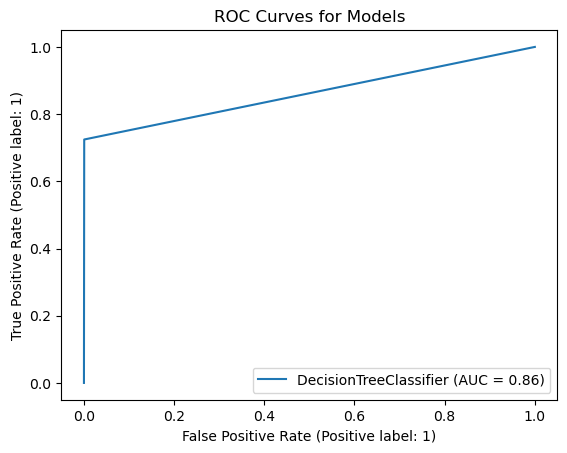

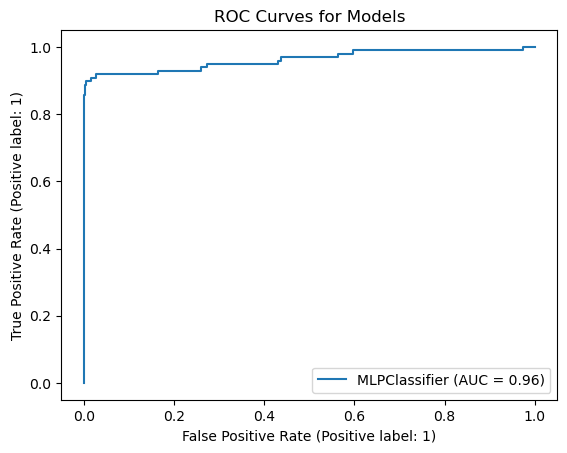

In [13]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title("ROC Curves for Models")

plt.show()


In [14]:
iso = IsolationForest(contamination=0.001, random_state=42)
iso.fit(X_train_scaled)
anomaly_scores = iso.predict(X_test_scaled)
anomaly_scores = [1 if x == -1 else 0 for x in anomaly_scores]
print("Isolation Forest Report:")
print(classification_report(y_test, anomaly_scores))


Isolation Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.26      0.31        98

    accuracy                           1.00     56962
   macro avg       0.69      0.63      0.65     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
param_grid = {
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]}

grid = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced'),
    param_grid,
    scoring='f1',
    cv=3)

grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 2}
Best Score: 0.7295246840701387


In [18]:
joblib.dump(models["Logistic Regression"], "logistic_fraud.joblib")
joblib.dump(models["Decision Tree"], "decisiontree_fraud.joblib")
joblib.dump(models["Neural Network"], "nn_fraud.joblib")

print("Models saved successfully.")


Models saved successfully.


In [19]:
sample = X_test_scaled[0].reshape(1, -1)

print("Logistic Prediction:", models["Logistic Regression"].predict(sample))
print("Decision Tree Prediction:", models["Decision Tree"].predict(sample))
print("Neural Net Prediction:", models["Neural Network"].predict(sample))


Logistic Prediction: [0]
Decision Tree Prediction: [0]
Neural Net Prediction: [0]
